In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '../../data/CHARLOTTE/'

In [4]:
import datetime

In [131]:
f = "Charlotte_CRN_1993_2010_15min_noFlag.txt"
df_old = pd.read_csv(path+'Raw Data/'+f, delim_whitespace=True, parse_dates = False)
times = pd.to_datetime(df_old.index + ' ' + df_old.date, format="%Y-%m-%d %H:%M:%S")
df_old.set_index(times, inplace=True)
# and maybe for cleanup
df_old = df_old.drop(['date'], axis=1)

/home/jsignell/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  app.launch_new_instance()


In [5]:
df_name = pd.read_csv(path+'Raw Data/'+"Charlotte_gage_list.txt", delim_whitespace=True)

In [6]:
ll = df_name.drop(['ID', 'NAME'], axis=1)

In [140]:
ll.to_csv(path+'Version1/Charlotte_CRN_lat_lon.csv', sep=',', index=False, header=False, na_rep=-999)

In [35]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y %m %d %H %M')
for i in df_name.index:
    df_ = pd.read_csv(path+'Raw Data/'+str(df_name["ID"][i])+".txt", delim_whitespace=True, header=None, 
                      names=['YYYY', 'mm', 'dd', 'HH', 'MM', 'tz', 'CRN{num:02d}'.format(num=i+1)],
                      parse_dates={'date_time': ['YYYY', 'mm', 'dd', 'HH', 'MM']},
                      date_parser=dateparse, index_col=0, na_values=['***', 'Eqp'])
    new = df_[df_.tz == 'EDT'].index+pd.DateOffset(hours=4)
    new = new.append(df_[df_.tz == 'EST'].index+pd.DateOffset(hours=5))

    new = new.sort_values()
    df_.set_index(new, inplace=True)
    df_ = df_.drop('tz', axis=1)
    df_ = df_.resample('15T', how='sum', label='right', closed='right')
    df_ = df_['2011':]
    tt = df_[df_[[0]] == 0].dropna().index
    for t in tt:
        if t.time() == datetime.time(0,0) or t.time() == datetime.time(12,0):
            df_[t:t+pd.DateOffset(hours=12)].fillna(method='ffill', limit=48, inplace=True)
    df_ = df_*100
    if i==0:
        df_all = df_
    else:
        df_all = df_all.join(df_)
        df_all.to_csv(path+'Raw Data/Charlotte_CRN_2011_2015_15min_noFlag.txt')

In [36]:
df = pd.read_csv(path+'Raw Data/Charlotte_CRN_2011_2015_15min_noFlag.txt', index_col=0, parse_dates=True)*25.4/100

In [132]:
df = df_old*25.4/100

In [37]:
df.insert(0, 'year', df.index.year)
df.insert(1, 'month', df.index.month)
df.insert(2, 'day', df.index.day)
df.insert(3, 'hour', df.index.hour)
df.insert(4, 'minute', df.index.minute)

In [38]:
for y in range(2011, 2016):
    year = str(y)
    out_name = 'Charlotte_CRN_gage_{YEAR}.csv'.format(YEAR=year)
    df_year = df['{YEAR}-01-01'.format(YEAR=year):'{YEAR}-12-31 23:45'.format(YEAR=year)]
    df_year.to_csv(path+'Version1/'+out_name, sep=',', index=False, header=False, na_rep=-99)

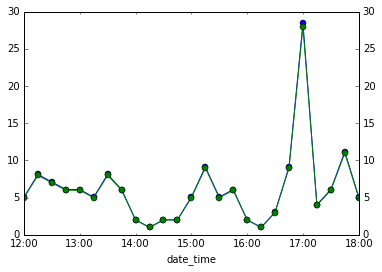

In [84]:
df['2009-12-25 12:00':'2009-12-25 18:00'].CRN01.plot( style='-bo')
df1['2009-12-25 12:00':'2009-12-25 18:00'].CRN01.plot( style='-go', secondary_y=True)

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"
f = "philadelphia_15min_rain_2012_2015.txt"
df = pd.read_csv(path+f, delim_whitespace=True, header=None)

labels = []
for i, col in enumerate(df.columns):
    if i < 5:
        continue
    if i%2 == 1:
        df[col].loc[df[df.columns[i+1]]==-1] = np.nan
    if i%2 ==0:
        labels.append(col)
df = df.drop(labels, axis=1)

for group in df.groupby(df[0]):
    group[1].to_csv(path+'Philadelphia_raingage_{YEAR}_NAN_filled.dat'.format(YEAR=group[0]),
                    header=False, index=False, sep=' ', na_rep = '-99')

In [4]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/'

def get_ll(cols=['lat', 'lon'], path=path, ll_file=ll_file):
    ll = pd.read_csv(path+ll_file, delim_whitespace=True, 
                             header=None, names=cols)
    if 'RG' not in cols:
        ll['RG'] = ll.index + 1
    ll.index = ll['RG']
    return ll

In [7]:
ll_file = 'll_loc{YEAR}.txt'.format(YEAR=2010)
ll2010 = get_ll(cols=['lat', 'lon'], path=path, ll_file=ll_file)
ll2010.index = zip(ll2010.lat, ll2010.lon)

You can check that 2009 exactly matches with 2010 by running:

In [8]:
ll2010.index == ll.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

You'll find that 2011 and 2012 also match, but 2013 doesn't

In [9]:
ll_file = 'll_loc{YEAR}.txt'.format(YEAR=2013)
ll2013 = get_ll(cols=['lat', 'lon'], path=path, ll_file=ll_file)
ll2013.index = zip(ll2013.lat, ll2013.lon)

In [10]:
ll2013.index == ll.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

However, it is contained within ll. This means that all the gages are the same, they are just in a different order

In [11]:
set(ll2013.index) == set(ll.index)

True

If we join them together, the RG column will reorganize to match the lat, lon index

In [12]:
ll = ll.join(ll2013, rsuffix='2013')

We'll do that same thing with 2014 and find that all but one of the gages are contained. Also one of the gages lat, lons in the other years, doesn't show up in 2014. We can find the gage that doesn't show up in 2014 because when we join it to ll, one of the RG vals goes to nan. We will add the missing gage to the ll_loc.txt file, and change the nan val to 101.

In [13]:
ll_file = 'll_loc{YEAR}.txt'.format(YEAR=2014)
ll2014 = get_ll(cols=['lat', 'lon'], path=path, ll_file=ll_file)
ll2014.index = zip(ll2014.lat, ll2014.lon)

In [14]:
ll2014.loc[set(ll2014.index) - set(ll.index)]

,lat,lon,RG
"(38.80051, -90.20072)",38.80051,-90.20072,40


In [15]:
ll = ll.join(ll2014, rsuffix='2014')

In [16]:
ll.loc[ll.RG2014.isnull()]

,lat,lon,RG,lat2013,lon2013,RG2013,lat2014,lon2014,RG2014
"(38.73571, -90.46288)",38.73571,-90.46288,39,38.73571,-90.46288,99,NaN,NaN,NaN


In [17]:
ll.loc[ll.RG2014.isnull(),'RG2014'] = 101

Next we will get a list of integers representing the new column order in the data files. The order of the list is the current order in the files, and the numbers represent the new order. So for example: in 2014 old column 21 will now be the first data column in the file. Of course the date columns still come first in the same order as ever. 

In [18]:
order_2013 = [0, 1, 2, 3, 4]
order_2013.extend([int(i)+4 for i in ll.RG2013.values])
order_2013.append(101+4)

In [19]:
order_2014 = [0, 1, 2, 3, 4]
order_2014.extend([int(i)+4 for i in ll.RG2014.values])
order_2014.append(40+4)

Then once you have all your orders and you have checked them over you can step through year by year. In the years from 2009 to 2014 in St Louis we added one column because 2014 had a gage site that the others didn't include. 

In [55]:
year = 2013
path = 'C:/Users/Julia/Google Drive/STLOUIS/'
name = 'MSD{YEAR}_ref_UTC.csv'.format(YEAR=year)
out_name='StLouis_gage_{YEAR}.csv'.format(YEAR=year)

df = pd.read_csv(path+name, sep=',', header=None)
df[range(5,105)] = df[range(5,105)] * 25.4
df[df< 0] = -99
df[105] = (df[104]*0-99).apply(int)
df[order_2013].to_csv(path+out_name, sep=',', index=False, header=False)

name = 'radar{YEAR}_ref.dat'.format(YEAR=year)
out_name='StLouis_radar_{YEAR}.csv'.format(YEAR=year)

df = pd.read_csv(path+name, delim_whitespace=True, header=None)

for i in range(5):
    df[i] = df[i].apply(int)
df[105] = (df[104]*0-99).apply(int)
df[order_2013].to_csv(path+out_name, sep=',', index=False, header=False)

In [59]:
year = 2009
path = 'C:/Users/Julia/Google Drive/STLOUIS/'
name = 'MSD{YEAR}_ref_UTC.csv'.format(YEAR=year)
out_name='StLouis_gage_{YEAR}.csv'.format(YEAR=year)

df = pd.read_csv(path+name, sep=',', header=None)
df[range(5,105)] = df[range(5,105)] * 25.4
df[df< 0] = -99
df[105] = (df[104]*0-99).apply(int)
df.to_csv(path+out_name, sep=',', index=False, header=False)

name = 'radar{YEAR}_ref.dat'.format(YEAR=year)
out_name='StLouis_radar_{YEAR}.csv'.format(YEAR=year)

df = pd.read_csv(path+name, delim_whitespace=True, header=None)

for i in range(5):
    df[i] = df[i].apply(int)
df[105] = (df[104]*0-99).apply(int)
df.to_csv(path+out_name, sep=',', index=False, header=False)

In [239]:
year = 2008
path = 'C:/Users/Julia/Google Drive/STLOUIS/'
name = 'MSD{YEAR}_ref_UTC.csv'.format(YEAR=year)
out_name='StLouis_gage_{YEAR}.csv'.format(YEAR=year)

df = pd.read_csv(path+name, sep=',', header=None)
df[range(5,len(df.columns))] = df[range(5,len(df.columns))] * 25.4
df[df< 0] = -99
df.to_csv(path+out_name, sep=',', index=False, header=False)

name = 'radar{YEAR}_ref.dat'.format(YEAR=year)
out_name='StLouis_radar_{YEAR}.csv'.format(YEAR=year)

df = pd.read_csv(path+name, sep=',', header=None)

for i in range(5):
    df[i] = df[i].apply(int)
df.to_csv(path+out_name, sep=',', index=False, header=False)

In [240]:
out_name = 'StLouis_gage_{YEAR}.csv'.format(YEAR=year)
def dateparse(Y, m, d, H, M):
    d = pd.datetime(int(Y), int(m), int(d), int(H), int(M))
    return d

df = pd.read_csv(path+out_name, sep=',', header=None, parse_dates={'date_time': range(0,5)}, date_parser=dateparse, index_col=0)
dr = pd.date_range('{YEAR}-01-01'.format(YEAR=year), '{YEAR}-12-31 23:45'.format(YEAR=year), freq='15T')
df = df.reindex(index=dr, fill_value = -99)
df[0] = df.index.year
df[1] = df.index.month
df[2] = df.index.day
df[3] = df.index.hour
df[4] = df.index.minute

df[range(0,len(df.columns))].to_csv(path+out_name, sep=',', index=False, header=False)

In [241]:
year = '2008'

In [242]:
df = pd.read_csv(path+'ll_loc{YEAR}.txt'.format(YEAR=year), delim_whitespace=True, header=None)
df.to_csv(path+'Version1/'+'lat_lon_{YEAR}.csv'.format(YEAR=year), sep=',', index=False, header=False)

### For writing to a file once it is Version2

In [20]:
import pandas as pd
import numpy as np

In [38]:
year=2014
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version2/'
name = 'StLouis_MSD_radar_{YEAR}.csv'.format(YEAR=year)
def dateparse(Y, m, d, H, M):
    d = pd.datetime(int(Y), int(m), int(d), int(H), int(M))
    return d

df = pd.read_csv(path+name, sep=',', header=None, parse_dates={'date_time': range(0,5)}, date_parser=dateparse, index_col=0)

In [39]:
df[44].max()

0.0

In [40]:
df[44] = -99

In [41]:
df[44].max()

-99L

In [42]:
df[0] = df.index.year
df[1] = df.index.month
df[2] = df.index.day
df[3] = df.index.hour
df[4] = df.index.minute

df[range(0,len(df.columns))].to_csv(path+name, sep=',', index=False, header=False)

In [66]:
year = 2006
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version2/'
name = 'StLouis_MSD21_radar_{YEAR}.csv'.format(YEAR=year)

In [67]:
df = pd.read_csv(path+name, sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2006,4,1,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2006,4,1,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2006,4,1,0,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,2006,4,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,2006,4,1,1,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [68]:
df[range(len(df.columns)-1)].to_csv(path+name, sep=',', index=False, header=False)